 <h1 align="center">Students Performance in Exams</h1> 
<h5 align="center">Marks secured by the students in various subjects</h5>  

### # Source:- https://www.kaggle.com/spscientist/students-performance-in-exams
### # Inspiration:-
    To understand the influence of the parents background, test preparation etc on students performance

# 1. Import Important Libraries:~

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Our DataSet:~

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# check for any missing values in our dataset
df.isna().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Since there is not missing. So, there is no need of data cleaning.

# 3. Data Analysis:~

In [11]:
df.shape

(1000, 8)

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [21]:
female = df[df['gender']=='female']
male = df[df['gender']=='male']

In [28]:
female.describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181
std,15.491453,14.378245,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


In [30]:
male.describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203
std,14.356277,13.931832,14.113832
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,75.000000,73.750000
max,100.000000,100.000000,100.000000


## Subject scores w.r.t gender

In [66]:
# filling mean value for getting a rough knowledge
gender_df = pd.DataFrame({'gender':['female','male'], 'math score':[63.633205,68.728216],
                 'reading score':[72.608108,65.473029],'writing score':[72.467181,63.311203]})
gender_df

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


(array([0, 1]), <a list of 2 Text xticklabel objects>)

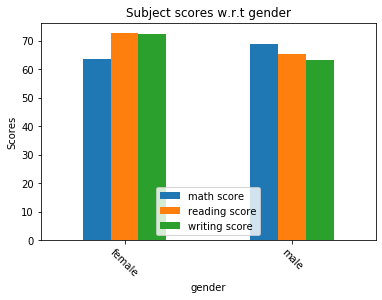

In [67]:
gender_df.plot(x="gender", y=["math score", "reading score", "writing score"], kind="bar").set_title("Subject scores w.r.t gender")
plt.ylabel('Scores', weight =True)
plt.xticks(rotation=-45)

#### From above graph we can say that Female are better in reading and writing scores then male, while male are better in Math score.

##  Let see can race/ethnicity bring any change in scores

In [54]:
# Created Fuction which will simplify our work
def new_data(X):
    data = pd.DataFrame()
    types = []
    math_score = []
    reading_score = []
    writing_score = []
    for i in df[X].unique():
        a = df[df[X]==i]
        b = a['math score'].mean()
        c = a['reading score'].mean()
        d = a['writing score'].mean()
        types.append(i)
        math_score.append(b)
        reading_score.append(c)
        writing_score.append(d)
    data[X] = types
    data['math_score'] = math_score
    data['reading_score'] = reading_score  
    data['writing_score'] = writing_score  
    return data        

In [68]:
data = new_data('race/ethnicity')
data

,race/ethnicity,math_score,reading_score,writing_score
0,group B,63.452632,67.352632,65.600000
1,group C,64.463950,69.103448,67.827586
2,group A,61.629213,64.674157,62.674157
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

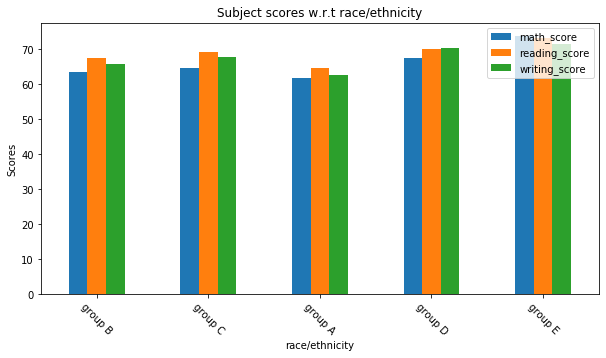

In [70]:
data.plot(x="race/ethnicity", y=["math_score", "reading_score", "writing_score"], kind="bar", figsize = (10,5)).set_title("Subject scores w.r.t race/ethnicity")
plt.ylabel('Scores', weight =True)
plt.xticks(rotation=-45)

#### From above Group E race/ethnicity have high scores in each among all.

## Can parental level of education change their Child performance in test score?

In [61]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [71]:
data = new_data('parental level of education')
data

,parental level of education,math_score,reading_score,writing_score
0,bachelor's degree,69.389831,73.000000,73.381356
1,some college,67.128319,69.460177,68.840708
2,master's degree,69.745763,75.372881,75.677966
3,associate's degree,67.882883,70.927928,69.896396
4,high school,62.137755,64.704082,62.448980
5,some high school,63.497207,66.938547,64.888268


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

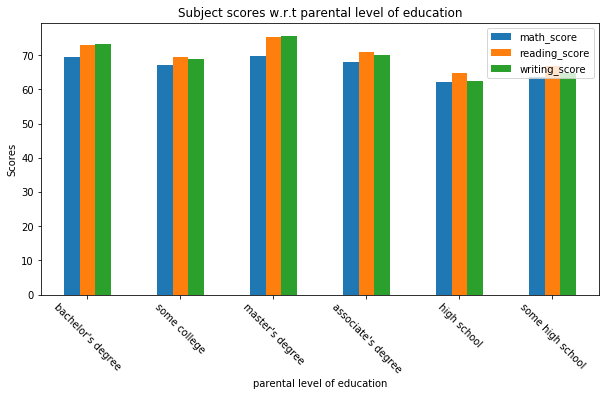

In [72]:
data.plot(x="parental level of education", y=["math_score", "reading_score", "writing_score"], kind="bar", figsize = (10,5)).set_title("Subject scores w.r.t parental level of education")
plt.ylabel('Scores', weight =True)
plt.xticks(rotation=-45)

#### From above graph we can say : Yes, parental level of education can show a little help in there child score. 

## Can standard or free/reduced eating habit change child score?

In [73]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [75]:
data = new_data('lunch')
data

,lunch,math_score,reading_score,writing_score
0,standard,70.034109,71.654264,70.823256
1,free/reduced,58.921127,64.653521,63.022535


(array([0, 1]), <a list of 2 Text xticklabel objects>)

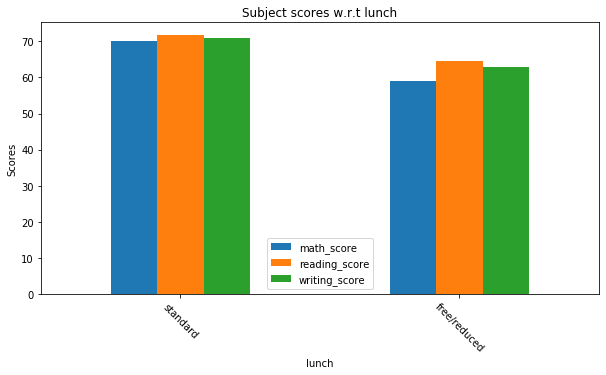

In [76]:
data.plot(x="lunch", y=["math_score", "reading_score", "writing_score"], kind="bar", figsize = (10,5)).set_title("Subject scores w.r.t lunch")
plt.ylabel('Scores', weight =True)
plt.xticks(rotation=-45)

#### Yes, standard or free/reduced eating habit show big difference in scores

## Can test preparation course bring any change in child scores?

In [78]:
data = new_data('test preparation course')
data

,test preparation course,math_score,reading_score,writing_score
0,none,64.077882,66.534268,64.504673
1,completed,69.695531,73.893855,74.418994


(array([0, 1]), <a list of 2 Text xticklabel objects>)

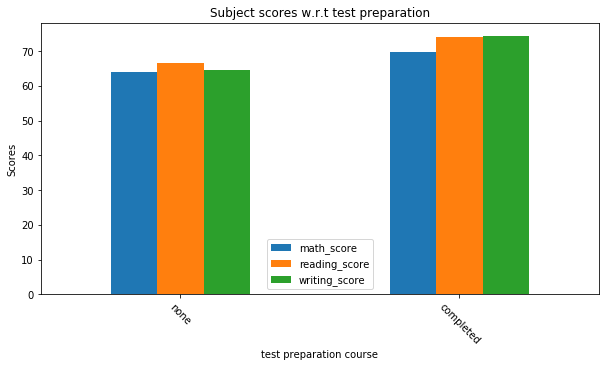

In [79]:
data.plot(x="test preparation course", y=["math_score", "reading_score", "writing_score"], kind="bar", figsize = (10,5)).set_title("Subject scores w.r.t test preparation")
plt.ylabel('Scores', weight =True)
plt.xticks(rotation=-45)

#### Yes, preperation tests can improve the scores of the child.